In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.metrics import mean_squared_error


# Read data
data = pd.read_csv('C:/Users/josep/Downloads/student-por.csv')
# Overview of data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


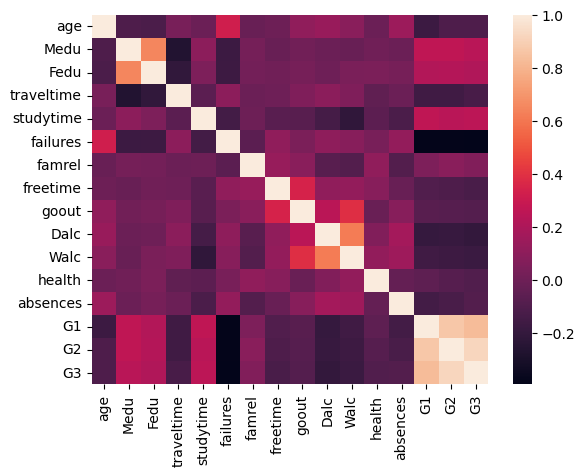

In [19]:
# Correlation Matrix of variables.
dataplot = sns.heatmap(data.corr(numeric_only=True))
plt.show()

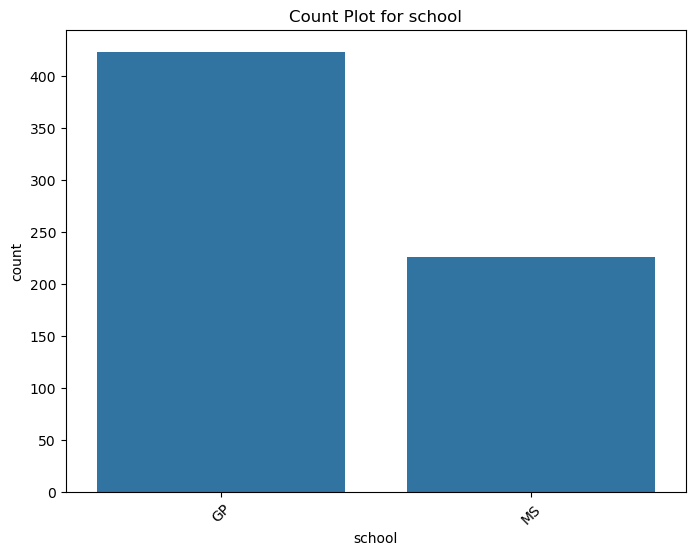

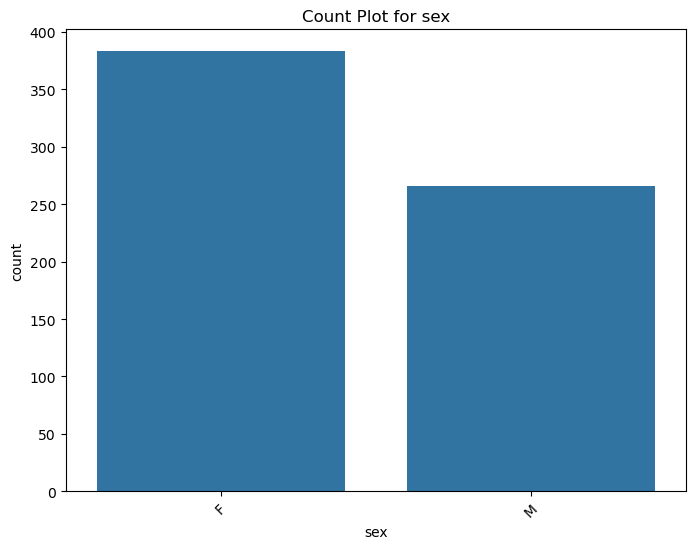

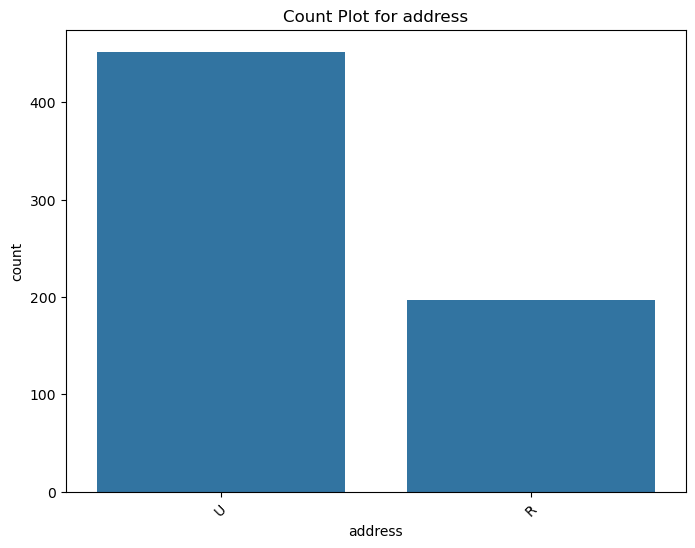

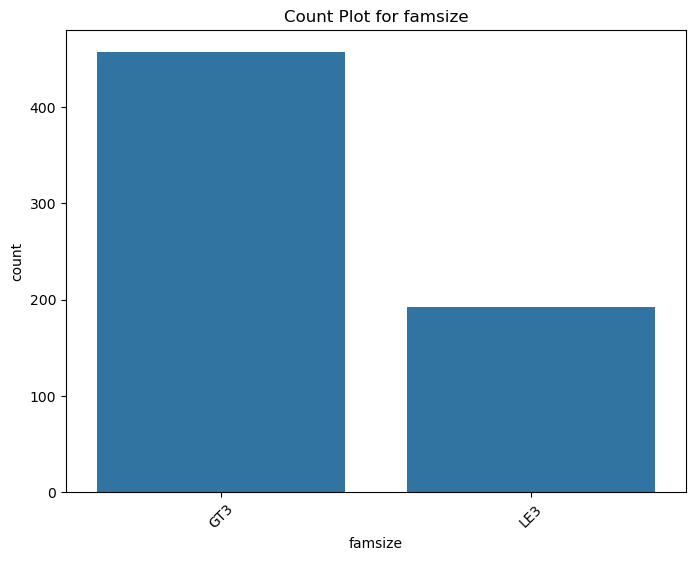

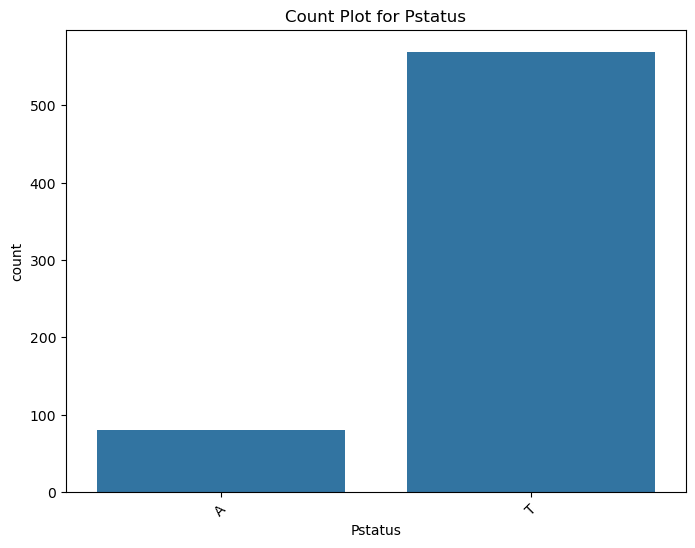

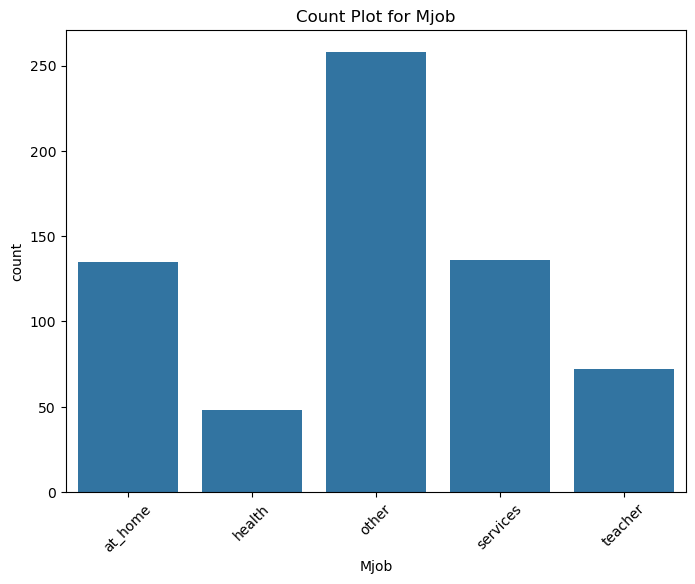

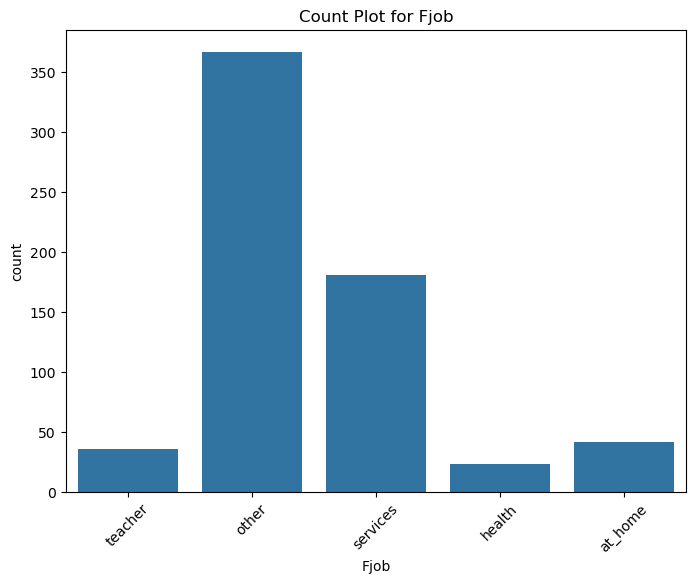

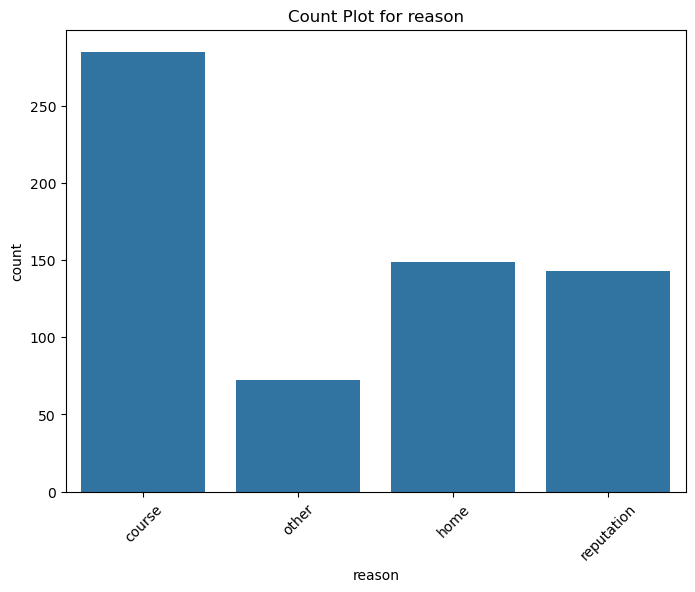

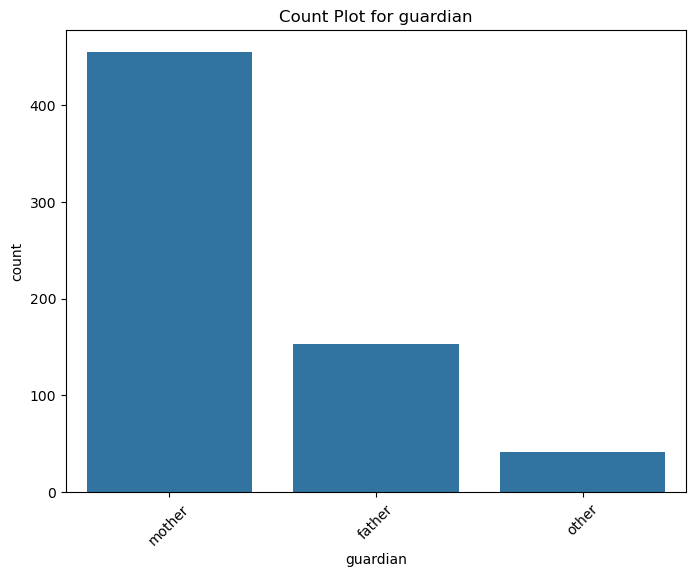

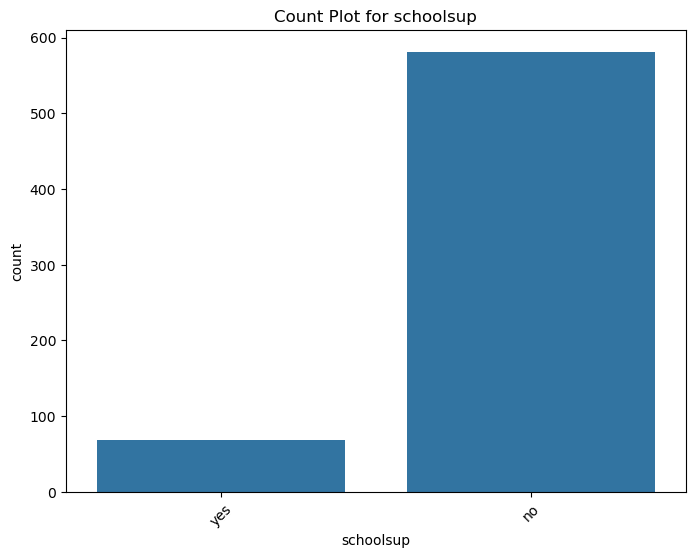

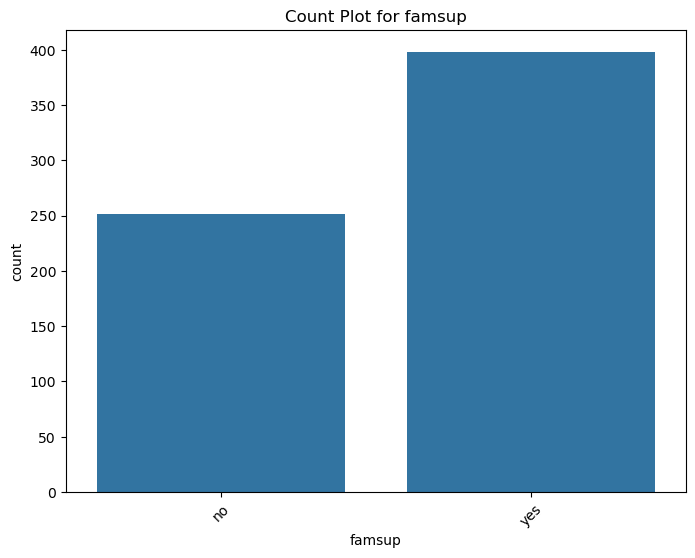

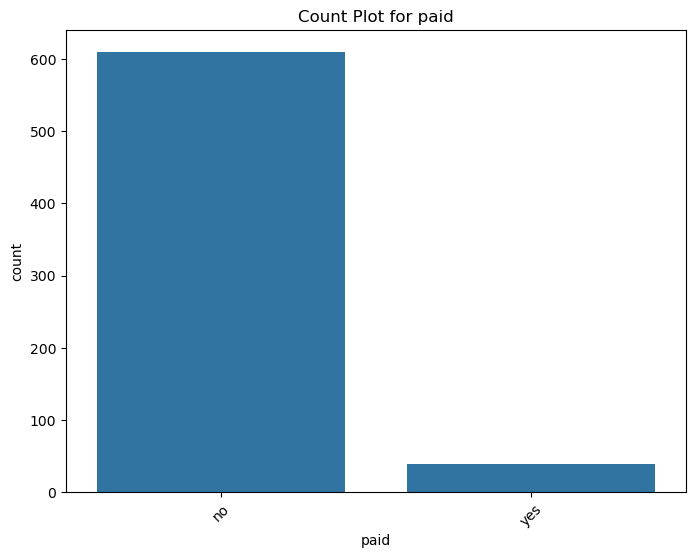

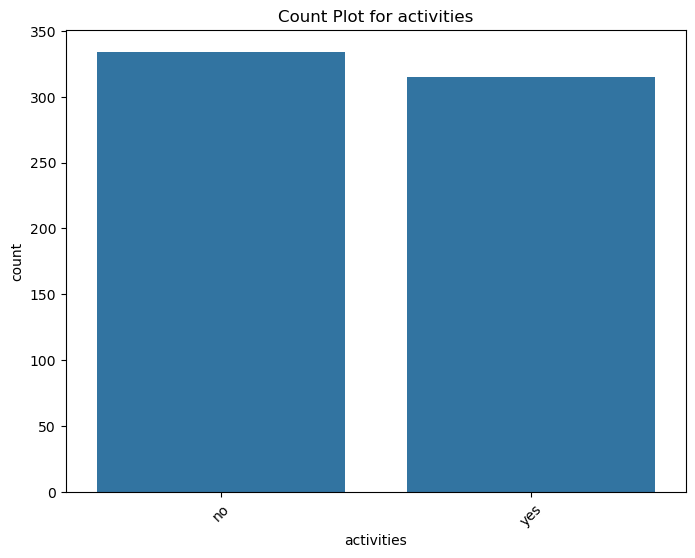

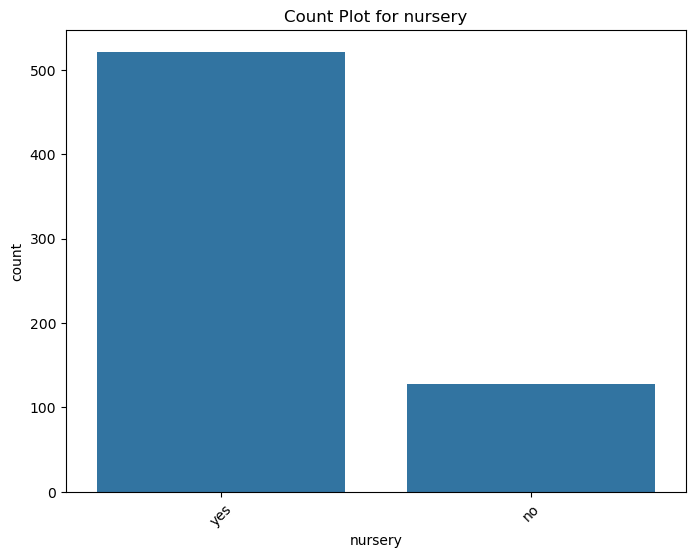

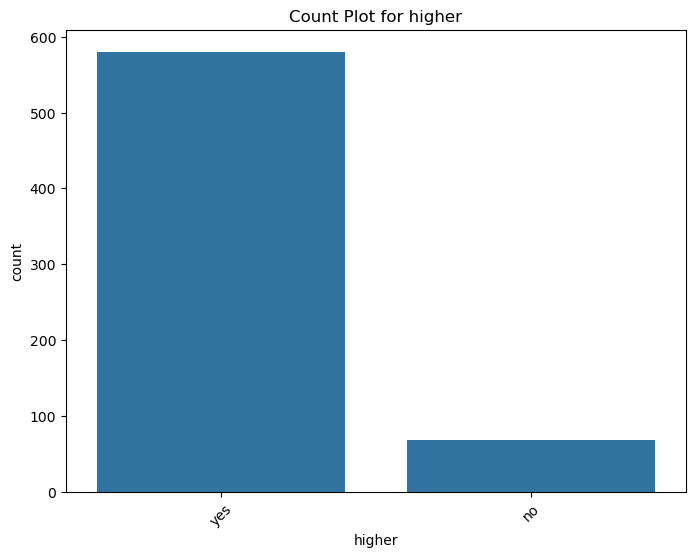

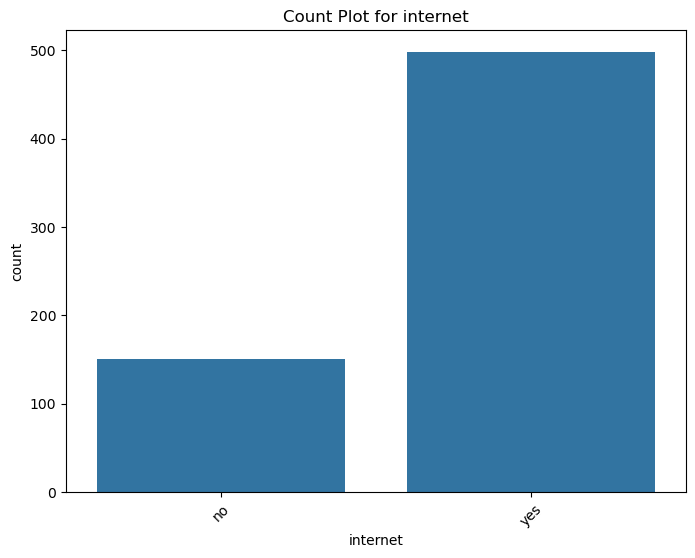

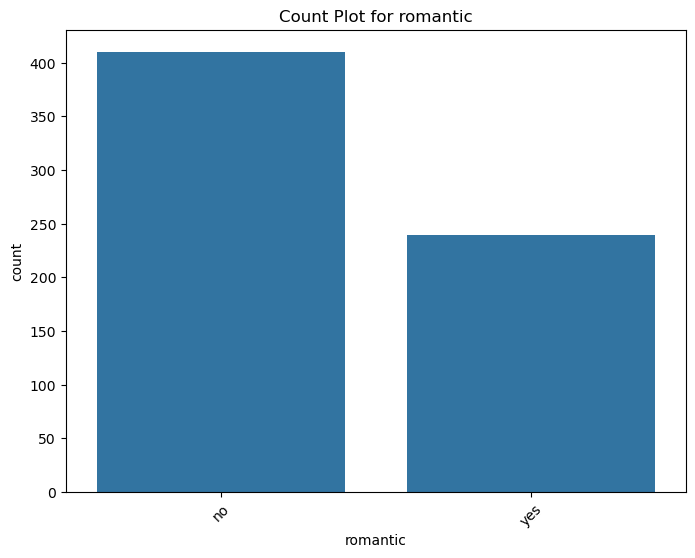

In [20]:
# Filter categorical columns
categorical_columns = data.select_dtypes(include='object').columns

# Loop through each categorical column and create a count plot
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.show()

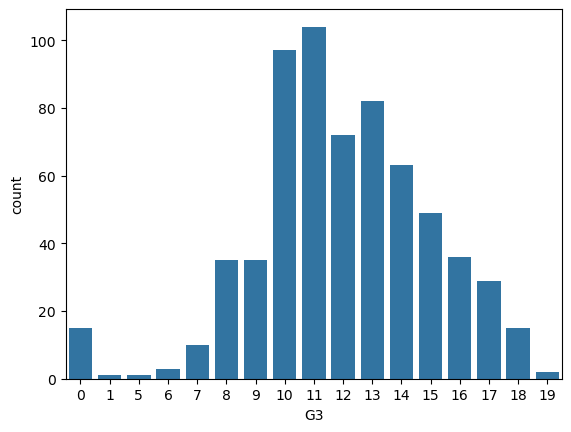

In [21]:
sns.countplot(x='G3', data=data)
# outliers at 0, possible error
# Get rid of rows where G3 is 0.
data = data[data['G3'] != 0]
#sns.countplot(x='G3', data=data)

In [22]:
data['G3'].describe()

count    634.000000
mean      12.187697
std        2.691824
min        1.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

,Feature,Category 1,Category 2,T-Statistic,P-Value,Adjusted P-Value,Significant
0,school,GP,MS,5.662923,2.260353e-08,9.493481e-07,True
1,sex,F,M,3.342934,8.779198e-04,3.687263e-02,False
2,address,U,R,3.097632,2.037224e-03,8.556339e-02,False
3,famsize,GT3,LE3,-0.429265,6.678767e-01,2.805082e+01,False
4,Pstatus,A,T,0.105905,9.156914e-01,3.845904e+01,False
5,Mjob,at_home,health,-3.782567,2.121431e-04,8.910011e-03,False
6,Mjob,at_home,other,-2.389258,1.737067e-02,7.295681e-01,False
7,Mjob,at_home,services,-2.658241,8.334419e-03,3.500456e-01,False
8,Mjob,at_home,teacher,-5.774217,2.935794e-08,1.233034e-06,True
9,Mjob,health,other,2.428042,1.577654e-02,6.626148e-01,False


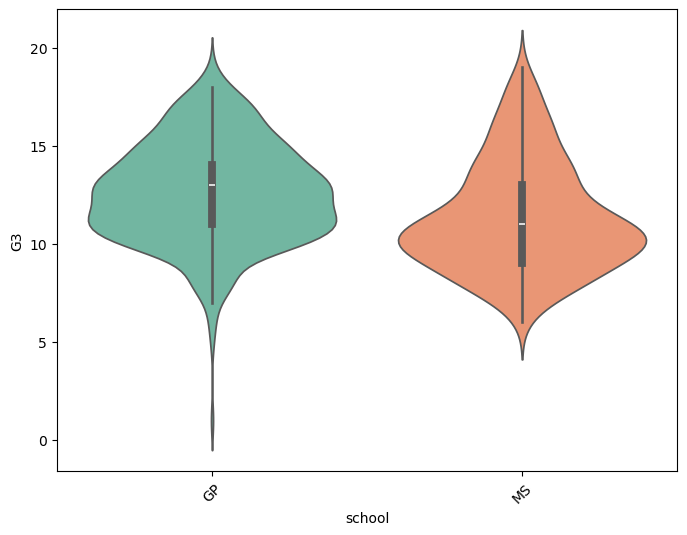

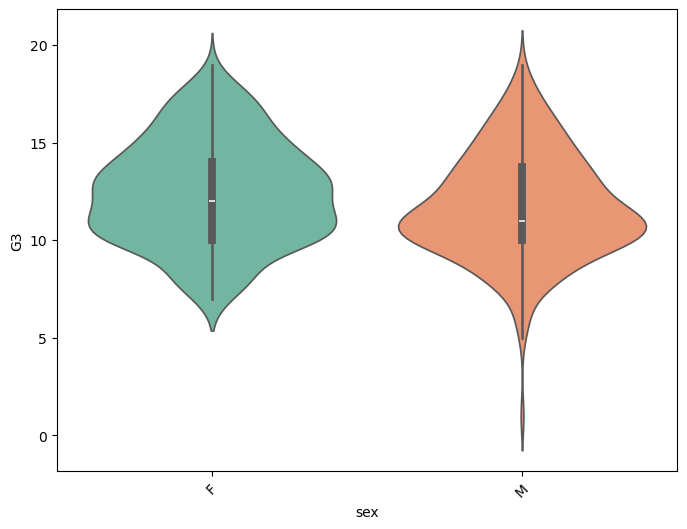

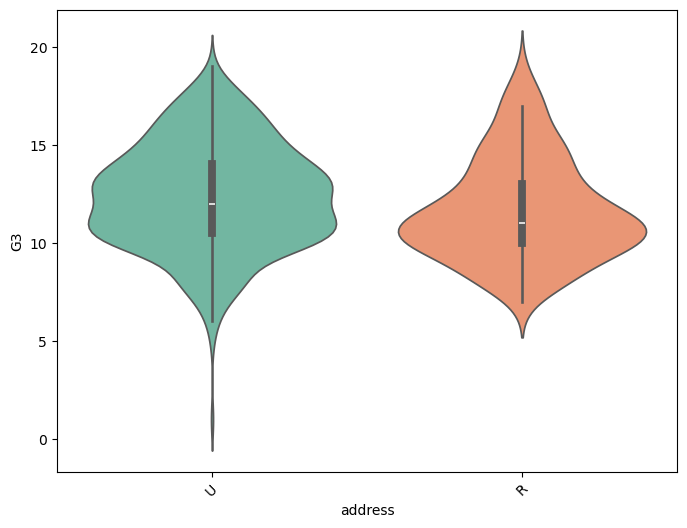

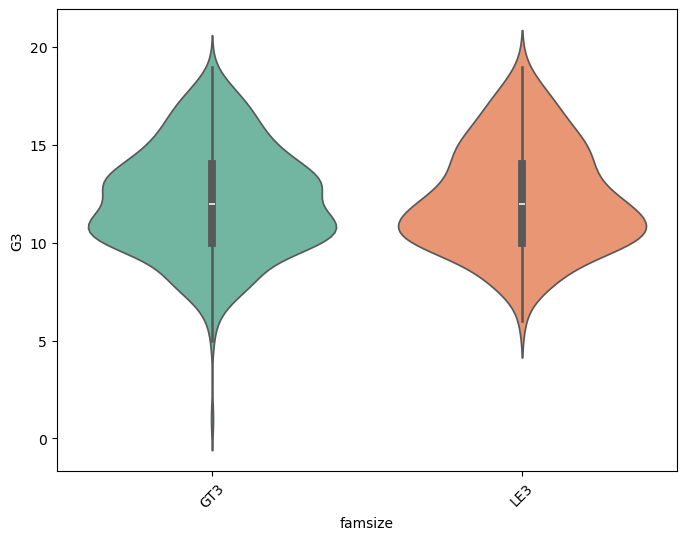

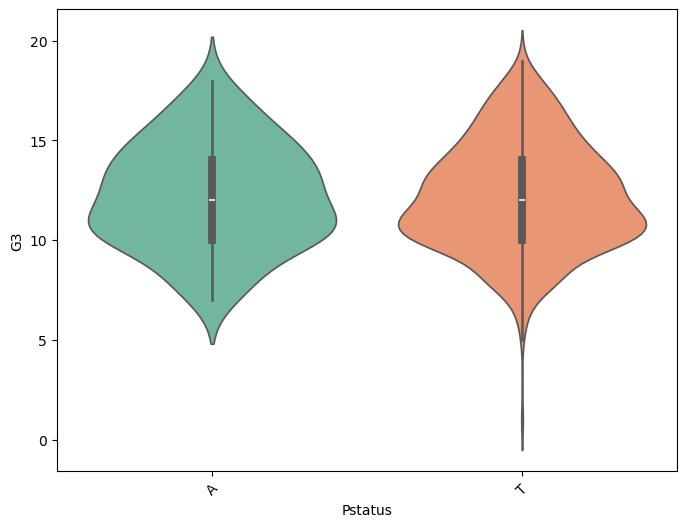

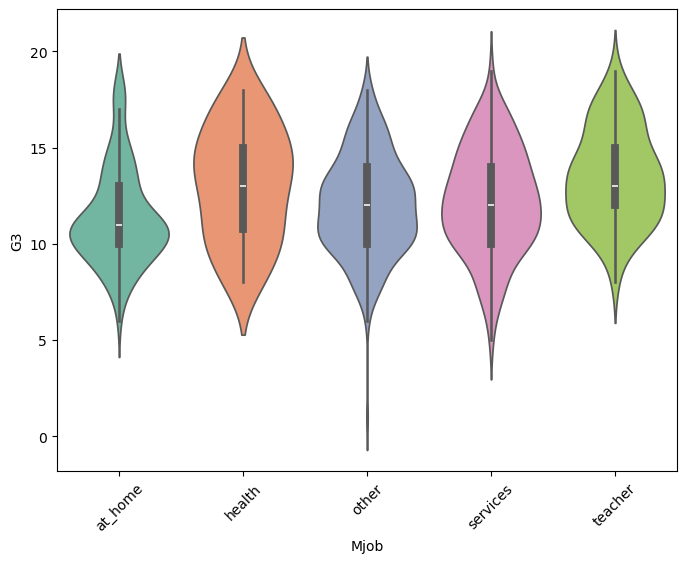

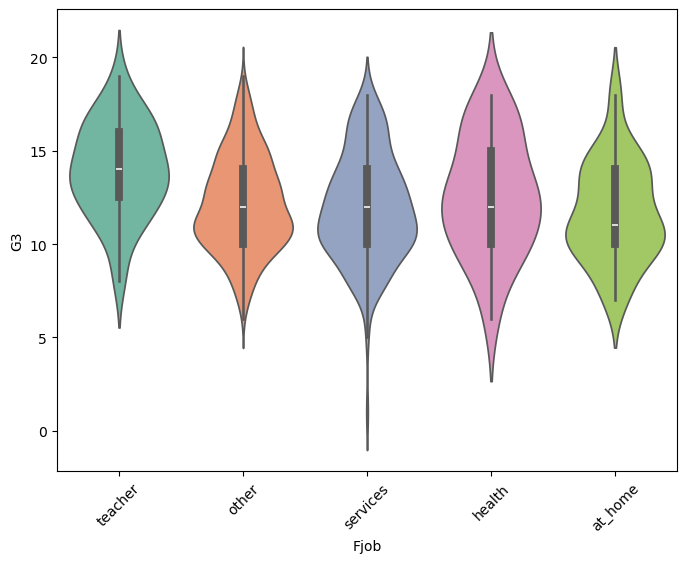

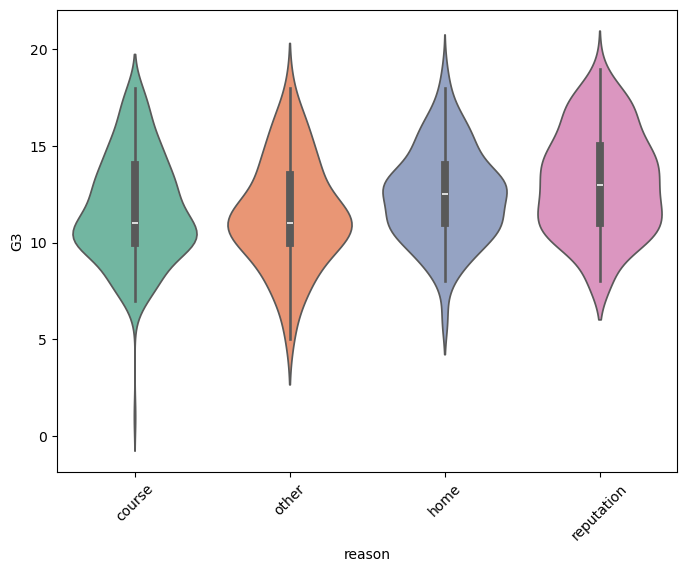

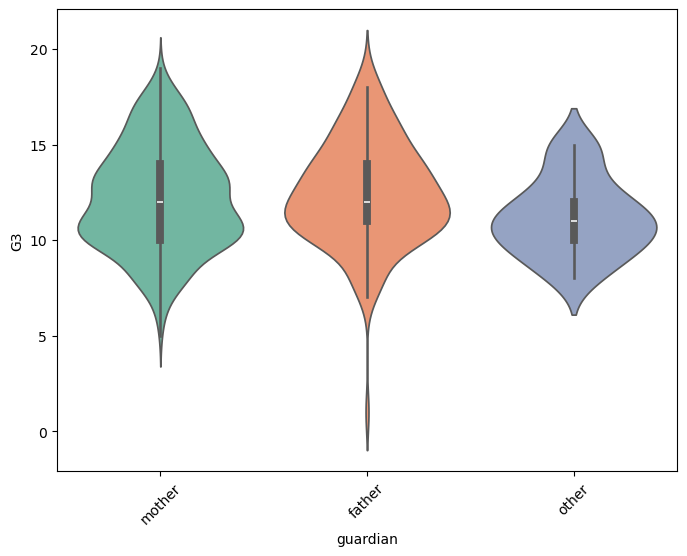

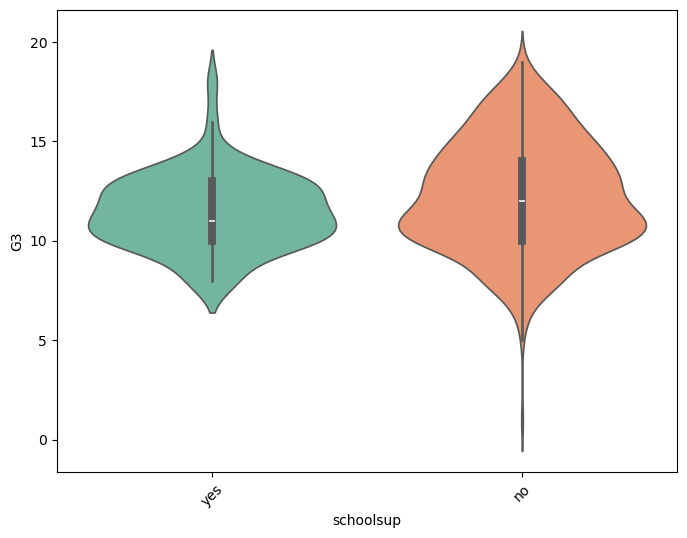

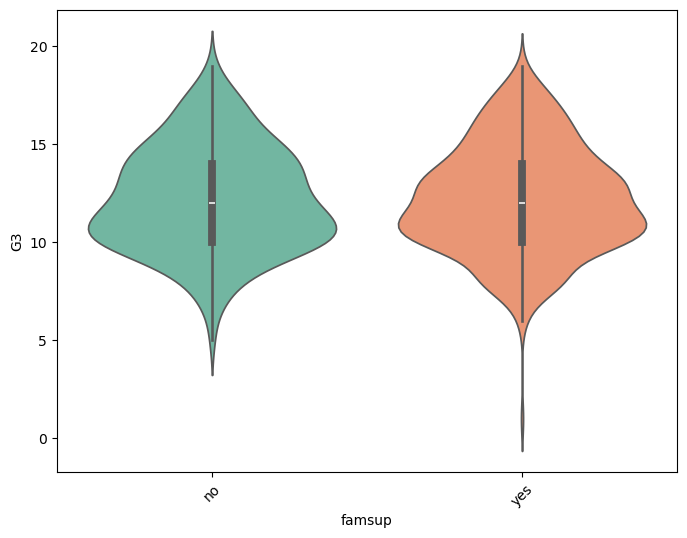

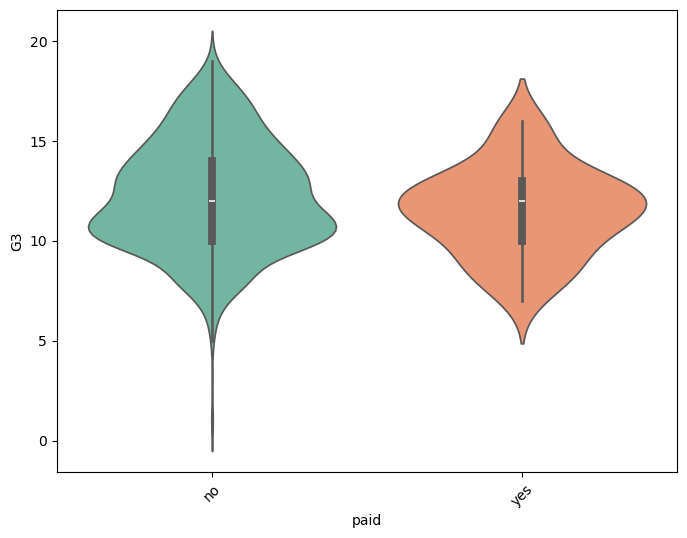

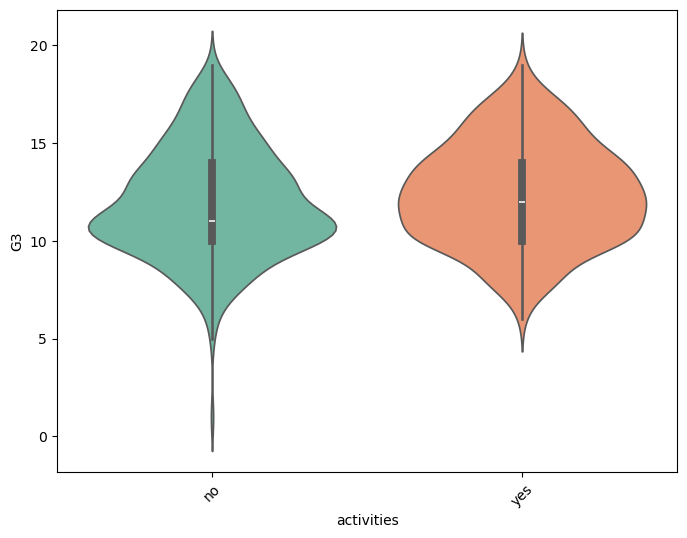

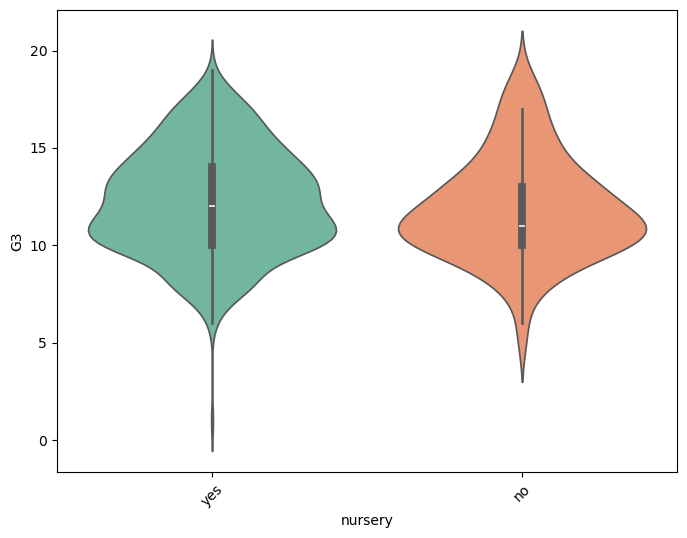

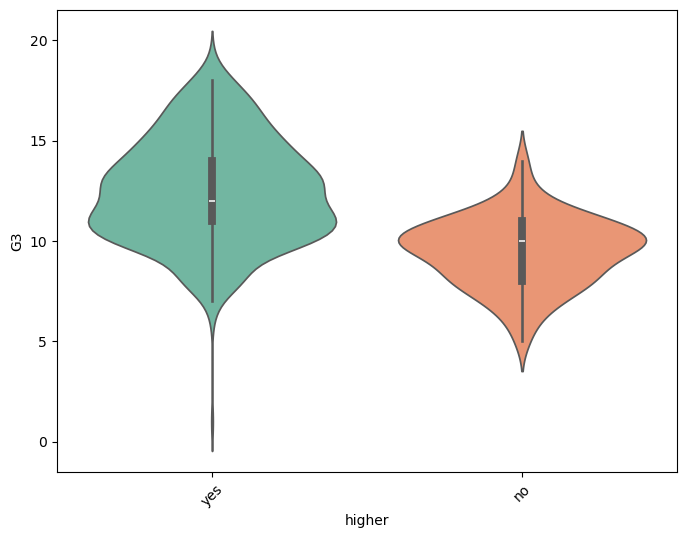

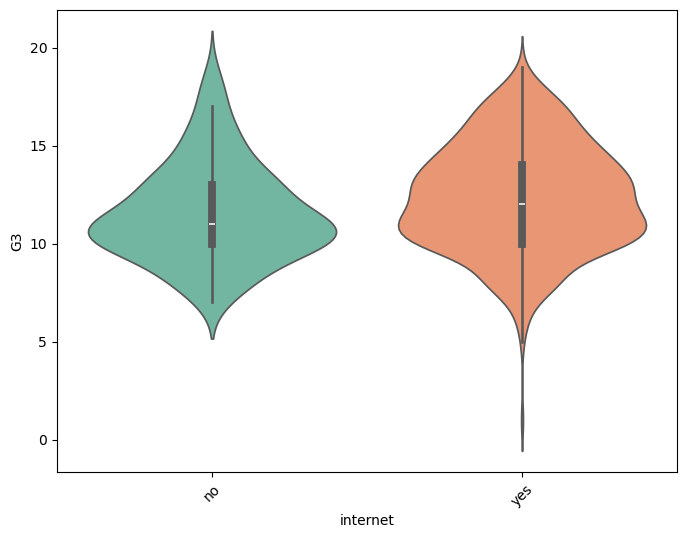

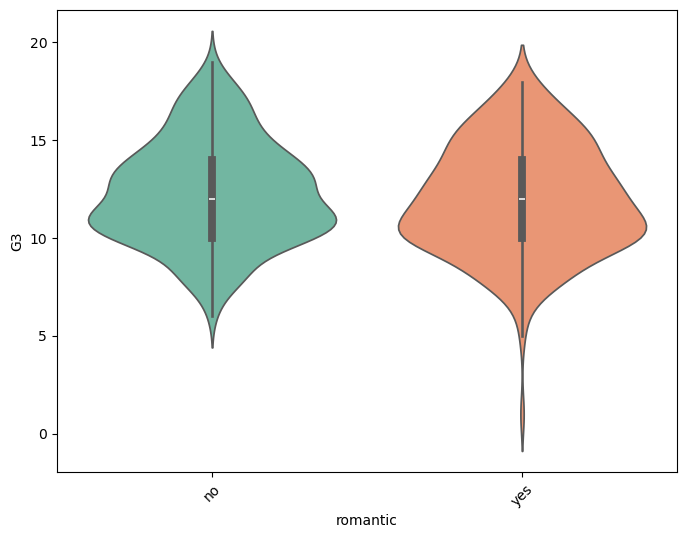

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


results = []
num_tests = 0  # To count the number of pairwise comparisons

# For each categorical feature
for feature in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=feature, y='G3', data=data, palette='Set2', hue=feature)
    #plt.title(f'Distribution of Categories in {feature} in relation to G3')
    plt.xticks(rotation=45)
    
    # Get unique categories for the feature
    categories = data[feature].unique()
    
    for i in range(len(categories)):
        for j in range(i+1, len(categories)):
            group1 = data[data[feature] == categories[i]]['G3']
            group2 = data[data[feature] == categories[j]]['G3']

            # Perform t-test between the two groups
            t_stat, p_val = stats.ttest_ind(group1, group2)
            num_tests += 1  # Increment number of tests

            results.append([feature, categories[i], categories[j], t_stat, p_val])

# Convert results into a DataFrame
results_df = pd.DataFrame(results, columns=['Feature', 'Category 1', 'Category 2', 'T-Statistic', 'P-Value'])

# Bonferroni correction
bonferroni_alpha = 0.05 / num_tests  # Adjusted alpha
results_df['Adjusted P-Value'] = results_df['P-Value'] * num_tests

results_df['Significant'] = results_df['Adjusted P-Value'] < bonferroni_alpha

results_df.to_csv('categorical_ttests_with_bonferroni.csv', index=False)

results_df


In [24]:
# Separate features and target variable
X = data.drop("G3", axis=1)
y = data["G3"]
# Data types of features
#X.info()

In [25]:
# Inspect easily the  presence of missing values.
# print(data.isnull().sum())

In [26]:
# Use ColumnTransformer to define transformer that one hot encodes categorical features and standardizes numerical features
col_trans = ColumnTransformer(
    [
        ('one_hot', OneHotEncoder(), make_column_selector(dtype_include=object)),
        ('standardize', StandardScaler(), make_column_selector(dtype_include=np.number))   
    ]
)
X_scaled_and_encoded = col_trans.fit_transform(X)
#convert back to df
X_scaled_and_encoded = pd.DataFrame(X_scaled_and_encoded, columns=col_trans.get_feature_names_out())


In [27]:
# SVD matrix
U, s, Vh = np.linalg.svd(X_scaled_and_encoded)

# Explained variance ratio (normalized singular values)
explained_variance = (s ** 2) / np.sum(s ** 2)
cumulative_explained_variance = np.cumsum(explained_variance)

# Determine the number of components that explain > 95% variance
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
Vh_reduced = Vh[:num_components, :]

# Reconstruction
X_svd = X_scaled_and_encoded.dot(Vh_reduced.T)

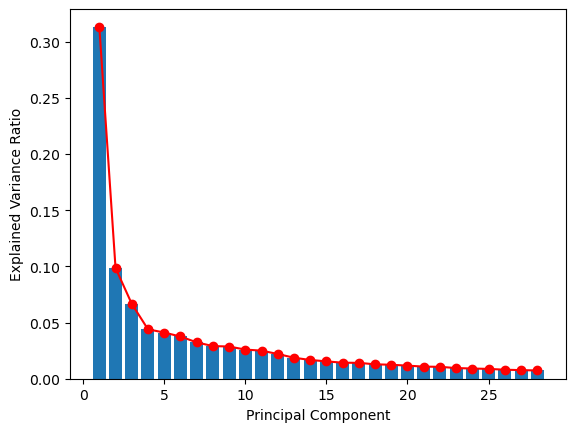

In [56]:
# Compute the importance of each component (more variance explained: more important)
explained_variance_ratio = (s ** 2) / np.sum(s ** 2)

# Visualise explained variance ratios
plt.bar(range(1, num_components + 1), explained_variance_ratio[: num_components], align="center")
plt.plot(range(1, num_components + 1), explained_variance_ratio[: num_components], color='red', marker='o', linestyle='-', label='Line Plot')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
#plt.title("Explained Variance Ratio per Principal Component (SVD)")
plt.show()

In [29]:
# Implementing gradient descent for parameter optimisation
def add_beta_init_theta(X):
    m = len(y)
    # Add beta (y offset) 
    X = np.hstack((np.ones((m, 1)), X_scaled_and_encoded))
    # Initialize theta
    theta = np.zeros(X.shape[1])
    return X, theta

# Define the gradient descent function, from turorial 10-2
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)
        
    return theta, cost_history

In [66]:
def plot_costs(costs, titles):
    num_plots = len(costs)
    rows = 2
    cols = 2
    fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    for ax, cost_history, title in zip(axes, costs, titles):
        ax.plot(range(len(cost_history)), cost_history, linewidth=5)
        ax.set_ylabel("Cost")
        ax.set_title(f"Convergence with {title}")
        ax.grid(True)
        ax.set_aspect('auto')  # Same sizes
        ax.set_xlim([0, len(cost_history)])  
        ax.scatter(range(len(cost_history)), cost_history, color='red', s=30, zorder=5)  # Adjust 's' for circle size


    # Set equal size for all subplots
    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots
    plt.xlabel("Iterations")
    plt.tight_layout()
    plt.show()

In [31]:
def grid_search(X, y, theta, lr_list, it_list):
    # Initialise min cost
    min_cost = 1
    opt_it = -1
    opt_lr = -1
    # Test all combinations of learning rates
    for lr in lr_list:
        print(f'lr: {lr}')
        # And number of iterations
        for n_it in it_list:
            print(f'n_it: {n_it}')
            # Using gradient descent
            theta, cost_history = gradient_descent(X_grad_og, y, theta, lr, n_it)
            # That minimise cost
            cur_cost = cost_history[-1]
            print(cur_cost)
            if cur_cost < min_cost:
                opt_it = n_it
                opt_lr = lr
                min_cost = cur_cost
                
    return opt_it, opt_lr


learning_rate_vals = [0.01, 0.1]
num_iteration_vals = [10, 100, 1000]

X_grad_og, theta = add_beta_init_theta(X_scaled_and_encoded)
optimal_num_iterations, optimal_learning_rate = grid_search(X_grad_og, y,theta, learning_rate_vals, num_iteration_vals)
print(f'lr: {optimal_learning_rate} || it: {optimal_num_iterations}')
    

lr: 0.01
n_it: 10
11.513363845437432
n_it: 100
0.7411329602889195
n_it: 1000
0.4110124411323366
lr: 0.1
n_it: 10
0.4075466998049545
n_it: 100
0.39367589183454615
n_it: 1000
0.3912633817563906
lr: 0.1 || it: 1000


In [78]:
# Function for adding bias term and initializing theta
def add_beta_init_theta(X):
    # Add a bias term (column of ones) to the feature matrix X
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
    # Initialize theta (weights) to zeros
    theta = np.zeros(X_with_bias.shape[1])
    return X_with_bias, theta

# Function for Gradient Descent with train/test split
def evaluate_gradient_descent(X, y, learning_rate, num_iterations):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize theta and add bias term to training and testing sets
    X_train_grad, theta = add_beta_init_theta(X_train)
    X_test_grad, _ = add_beta_init_theta(X_test)  # Ensure same bias term for test data

    # Perform gradient descent
    theta, cost_history = gradient_descent(X_train_grad, y_train, theta, learning_rate, num_iterations)
    
    # Predict on test data
    predictions = X_test_grad.dot(theta)
    # Evaluate MSE
    mse = mean_squared_error(y_test, predictions)
    # Get root MSE for more interperatable results.
    rmse = np.sqrt(mse)
    # Evaluate R^2
    R2 = r2_score(y_test, predictions)
    
    
    return rmse, R2, cost_history

X_x = X_scaled_and_encoded.drop(["standardize__G1", "standardize__G2"], axis=1)
# Evaluate using gradient descent
rmse_og, R2_og, cost_og = evaluate_gradient_descent(X_scaled_and_encoded, y, optimal_learning_rate, optimal_num_iterations)
rmse_svd, R2_svd, cost_svd = evaluate_gradient_descent(X_svd, y, optimal_learning_rate, optimal_num_iterations)
rmse_x, R2_x, cost_x = evaluate_gradient_descent(X_x, y, optimal_learning_rate, optimal_num_iterations)
rmse_grad_bad, R2__grad_bad, cost__grad_bad = evaluate_gradient_descent(X_scaled_and_encoded, y, 0.01, 10)




# Output the results
print(f"Optimal θ     - RMSE: {rmse_og}, R^2: {R2_og}")
print(f"Worst θ      - RMSE: {rmse_grad_bad},    R^2: {R2__grad_bad}")
print(f"SVD                  - RMSE: {rmse_svd},  R^2: {R2_svd}")
print(f"No Past Exam Results - RMSE: {rmse_x},    R^2: {R2_x} ")


r_squares = [R2_og, R2__grad_bad, R2_svd, R2_x]
rmse_vals = [rmse_og, rmse_grad_bad, rmse_svd, rmse_x]
costs = [cost_og, cost__grad_bad, cost_svd, cost_x]
titles = ["Optimal θ", "Worst θ", "SVD", "No Past Exam Results"]




Optimal θ     - RMSE: 0.9450420475034325, R^2: 0.891027309425806
Worst θ      - RMSE: 4.434905754921274,    R^2: -1.3998505694060026
SVD                  - RMSE: 1.107936224782835,  R^2: 0.8502230665683522
No Past Exam Results - RMSE: 2.5263722919105636,    R^2: 0.22122839316102094 


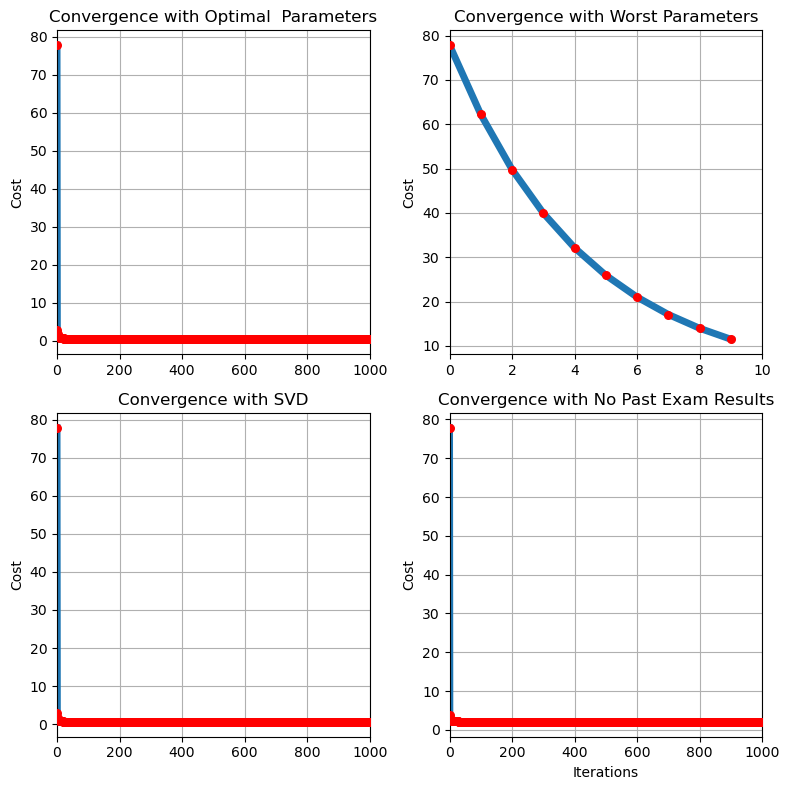

In [70]:
plot_costs(costs, titles)

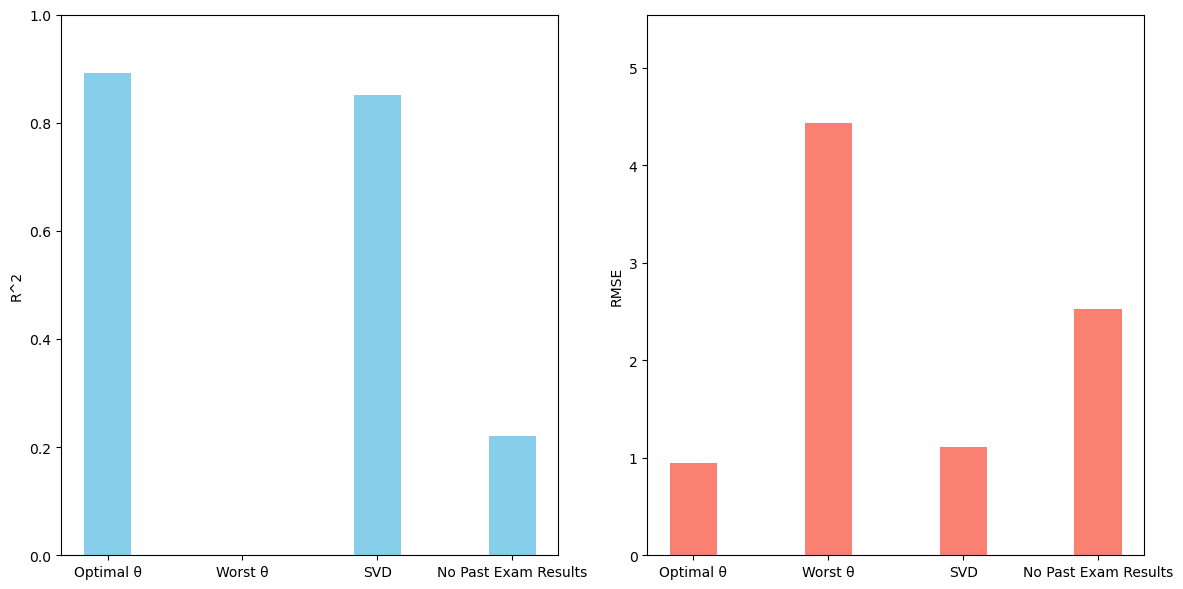

In [76]:
# Plot RMSE and R^2
# Plot RMSE and R^2
def plot_r2_rmse(titles, r2vals, rmse_vals):
    x = np.arange(len(titles))  # The label locations
    width = 0.35  # The width of the bars

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for R^2
    ax1.bar(x, r2vals, color='skyblue', width=width)
    ax1.set_ylabel('R^2')
    #ax1.set_title('R^2 Scores by Model')
    ax1.set_xticks(x)
    ax1.set_xticklabels(titles)
    ax1.set_ylim(0, 1)  

    # Plot for RMSE
    ax2.bar(x, rmse_vals, color='salmon', width=width)
    ax2.set_ylabel('RMSE')
    #ax2.set_title('RMSE Scores by Model')
    ax2.set_xticks(x)
    ax2.set_xticklabels(titles)
    ax2.set_ylim(0,max(rmse_vals) * 1.25)  

    plt.tight_layout()
    plt.show()
    
   

plot_r2_rmse(titles, r_squares, rmse_vals)

In [35]:
import numpy as np

states = ['bad', 'ok', 'good'] # Student performance
actions = ['studytime', 'dalc', 'walc'] # Actions that students can take.

rewards = {
    'bad': -10,
    'ok': 0,
    'good': 10
}

transition_probs = {
    'bad': {
        'studytime': {'bad': 0.6, 'ok': 0.3, 'good': 0.1},
        'dalc': {'bad': 0.8, 'ok': 0.15, 'good': 0.05},
        'walc': {'bad': 0.7, 'ok': 0.2, 'good': 0.1}
    },
    'ok': {
        'studytime': {'bad': 0.1, 'ok': 0.6, 'good': 0.3},
        'dalc': {'bad': 0.4, 'ok': 0.5, 'good': 0.1},
        'walc': {'bad': 0.5, 'ok': 0.4, 'good': 0.1}
    },
    'good': {
        'studytime': {'bad': 0.05, 'ok': 0.25, 'good': 0.7},
        'dalc': {'bad': 0.1, 'ok': 0.3, 'good': 0.6},
        'walc': {'bad': 0.2, 'ok': 0.4, 'good': 0.4}
    }
}

gamma = 0.9  # Discount factor
theta = 0.001  # Convergence threshold

#  Value function
V = {state: 0 for state in states}

def value_iteration():
    while True:
        delta = 0
        for state in states:
            v = V[state]
            # Compute the value of taking each action and update V[state]
            V[state] = max(
                sum(transition_probs[state][action][next_state] * 
                    (rewards[next_state] + gamma * V[next_state])
                    for next_state in states)
                for action in actions
            )
            delta = max(delta, abs(v - V[state]))
        if delta < theta:
            break

value_iteration()

# Optimal policy
policy = {}
for state in states:
    best_action = None
    best_value = float('-inf')
    for action in actions:
        action_value = sum(transition_probs[state][action][next_state] *
                           (rewards[next_state] + gamma * V[next_state])
                           for next_state in states)
        if action_value > best_value:
            best_value = action_value
            best_action = action
    policy[state] = best_action

print("Optimal Value Function:", V)
print("Optimal Policy:", policy)


Optimal Value Function: {'bad': 12.671430836856786, 'ok': 28.054094764865795, 'good': 36.167203244901174}
Optimal Policy: {'bad': 'studytime', 'ok': 'studytime', 'good': 'studytime'}
